<a href="https://colab.research.google.com/github/scottspurlock/csc4422-2022s/blob/main/tutorials/day13_tutorial_sna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 13 Tutorial
## Social Network Analysis (SNA)

Social networks help model groups of people and their relationships.
- Who knows who?
- Who can get you an introduction to someone?
- How does geography affect social connections?
- Who are the most influential/popular people in a social network?
- Etc.

Note that our focus is mostly on social networks, but the same ideas apply to other kinds of networks (often called graphs in computer science), which can model any kind of things and the connections between them (e.g., cities and roads).



The example below shows the 9-11 Hijacker network. Analyzing this type of network can help understand how these types of networks form and function.

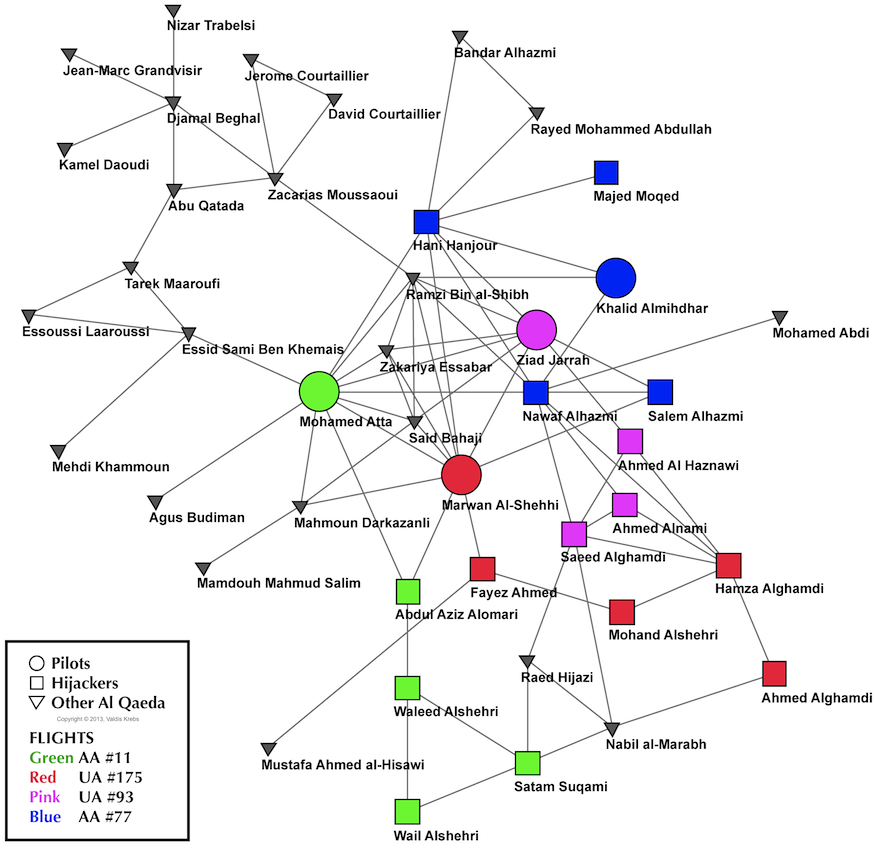

In [1]:
from IPython import display
display.Image('http://www.orgnet.com/911HijackersUpdatedMap.png')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


## networkx
The networx library will be our main tool for representing and analyzing networks. Networks are called Graphs and are made up of nodes (sometimes called vertices) and edges (sometimes called links). Nodes represent things of interest (often, people) and links represent relationships, which could be friendship, messages exchanged, similarity, distance, etc.

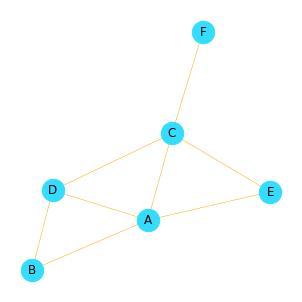

In [3]:
# First we create a Graph object (by default an undirected network).
G = nx.Graph()

# We can add nodes one at a time
G.add_node('A')

# or a bunch at once as a list
G.add_nodes_from(['B', 'C', 'D', 'E', 'F'])

# We can add edges one at a time
G.add_edge('A', 'B')

# or a bunch at once as a list
G.add_edges_from([('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'A'),
                  ('C', 'E'), ('D', 'A'), ('D', 'B'), ('D', 'C'),
                  ('E', 'A'), ('E', 'C'), ('C', 'F')])

# We can visualize a network as follows.
# Note that there are lots of parameters to adjust how things look.
plt.figure(figsize=(4, 4))

# Calculate the best position for laying out the nodes graphically.
# k controls how far apart nodes are forced to be and will usually need to be
# adjusted for each different graph.
pos = nx.spring_layout(G, k=0.8)

nx.draw(G, pos=pos, with_labels=True,
        node_color='#33ddff', node_size=500,
        edge_color='#ffaa00', width=0.5)
plt.show()


In [4]:
# If needed, we can get to the list of nodes in the graph
print('Nodes:', list(G.nodes))

# or edges
print('Edges:', list(G.edges))

Nodes: ['A', 'B', 'C', 'D', 'E', 'F']
Edges: [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'D'), ('C', 'E'), ('C', 'D'), ('C', 'F')]


## Centrality Measures
Numbers that describe a given node's network properties are called centrality measures. They measure how "important" a node is in a variety of different ways.
- Degree centrality: number of neighbors (for an undirected graph, this is just one number, while for directed graphs there is in-degree and out-degree).
- Betweenness centrality: how many shortest paths go through the node; helpful for identifying "brokers" or individuals who connect different parts of a network and may be well situated to filter, alter, or augment information.
- Closeness centrality: how close the node is to every other node, on average.
- Eigenvector centrality: how much a node is connected to other highly connected nodes. Nodes with a high value are sometimes called hubs.

In [5]:
# networkx can calculate these measures and return a dictionary
# with a key for each node.
print('- Degree Centrality:\n', nx.degree_centrality(G))
print('\n- Betweenness Centrality:\n', nx.betweenness_centrality(G))
print('\n- Closeness Centrality:\n', nx.closeness_centrality(G))
print('\n- Eigenvector Centrality\n', nx.eigenvector_centrality(G))

- Degree Centrality:
 {'A': 0.8, 'B': 0.4, 'C': 0.8, 'D': 0.6000000000000001, 'E': 0.4, 'F': 0.2}

- Betweenness Centrality:
 {'A': 0.25, 'B': 0.0, 'C': 0.45, 'D': 0.1, 'E': 0.0, 'F': 0.0}

- Closeness Centrality:
 {'A': 0.8333333333333334, 'B': 0.5555555555555556, 'C': 0.8333333333333334, 'D': 0.7142857142857143, 'E': 0.625, 'F': 0.5}

- Eigenvector Centrality
 {'A': 0.539477866745069, 'B': 0.3294814248104563, 'C': 0.49860785248588163, 'D': 0.45368879484387803, 'E': 0.3443845246203569, 'F': 0.16541344586096537}


## Graphs with direction and weights
### Directed graphs (DiGraphs)
By default, graph edges are undirected, which implies a symmetric relationship, like being Facebook friends. But sometimes edges have a direction like the difference in following someone on Twitter or being followed.

### Weighted edges
Sometimes an edge is either present or absent, and that's sufficient information. But sometimes it's helpful to associate a number with an edge, like a distance between places, or the number of emails sent from one person to another.

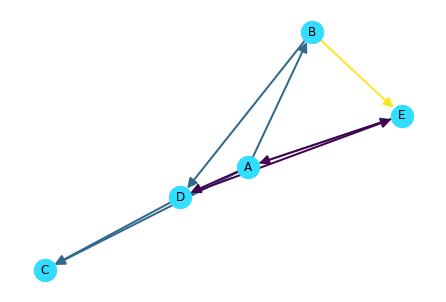

In [6]:
# *** Notice the following line changes Graph to DiGraph (Directed Graph) ***
G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])

# Adding weighted edges just requires a 3rd input.
G.add_edge('A', 'B', weight=2)

# or a bunch at once, as a list of tuples.
G.add_weighted_edges_from([('A', 'C', 2), ('A', 'D', 1),
         ('A', 'E', 3), ('D', 'E', 1), ('D', 'C', 2),
         ('B', 'E', 4), ('B', 'D', 2), ('E', 'A', 1)])

# Pull out the weights into a list.
# edge_weights = [G.edges[v, w]["weight"] for v, w in G.edges]
edge_weights = []
for edge in G.edges:
    # edge is a tuple with a from and to node
    node1, node2 = edge
    # look up the weight of the current edge and add it to the list
    edge_weights.append(G.edges[node1, node2]['weight'])

pos = nx.spring_layout(G, k=0.8)
nx.draw(G, pos=pos, with_labels=True,
        node_color='#33ddff', node_size=500, width=2,
        edge_color=edge_weights, edge_cmap=plt.cm.viridis, arrowsize=20)
plt.show()

## Network Density
The density is the proportion of actual edges to possible edges. Note that there are twice as many possible edges in a DiGraph (directed graph) as in an undirected graph, since you can have an edge from node v to node w, and from w to v.

A network is sparse when the number of edges is smaller and dense when most of the possible edges are present in the graph.


In [7]:
density = nx.density(G)
print("Network density:", density)
print("Manual calculation:", G.number_of_edges() / (G.number_of_nodes()*(G.number_of_nodes()-1)))

Network density: 0.45
Manual calculation: 0.45


## Assigning attributes to nodes

In [8]:
# It's often helpful to assign attributes to nodes in the network.

# For undirected graphs
degree_dict = dict(G.degree())
nx.set_node_attributes(G, degree_dict, 'degree')

# in_degree only works for directed graphs
in_degree_dict = dict(G.in_degree())
nx.set_node_attributes(G, in_degree_dict, 'in_degree')

# out_degree only works for directed graphs
out_degree_dict = dict(G.out_degree())
nx.set_node_attributes(G, out_degree_dict, 'out_degree')

betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')



In [9]:
# View all the attributes associated with a given node
print('For node A:')
G.nodes['A']

For node A:


{'betweenness': 0.3333333333333333,
 'degree': 5,
 'eigenvector': 0.3913934244350896,
 'in_degree': 1,
 'out_degree': 4}

## Get the top nodes based on a given attribute value.

In [10]:
from operator import itemgetter

# This line sorts the nodes based on their betweenness centrality score
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 5 nodes by betweenness centrality:")
for b in sorted_betweenness[:5]:
    print(b)


Top 5 nodes by betweenness centrality:
('A', 0.3333333333333333)
('E', 0.25)
('D', 0.08333333333333333)
('B', 0.0)
('C', 0.0)


## Visualize how many nodes have what degree.

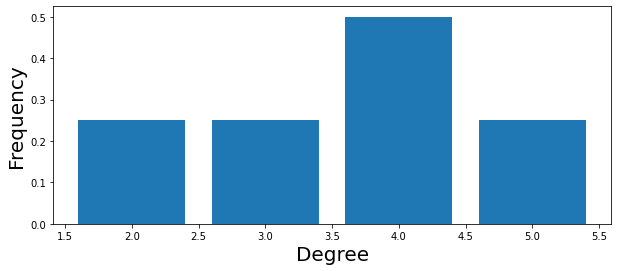

In [11]:
from collections import Counter

c = Counter(degree_dict.values())
s = sorted(c.most_common())[:20]
x = [a[0] for a in s]
y = [a[1]/len(s) for a in s]
plt.figure(figsize=(10, 4))
plt.bar(x, y)
plt.xlabel('Degree', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()


# Drawing networks with lots of nodes
When there are many nodes in the graph, visualization can get difficult. A few things help us see some structure:
- Use a spring layout to keep nodes separated.
- Make nodes very small
- Use transparency (alpha)
- Don't show labels
- Make edges light


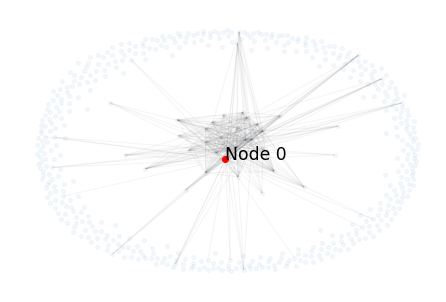

In [12]:
G = nx.Graph()

# Make a bunch of nodes
nn = 500
for i in range(nn):
  G.add_node(i)

# Add some edges
for i in range(nn):
  for j in range(i+1, nn//(i+10)):
    G.add_edge(i, j)

pos = nx.spring_layout(G, k=0.8)
nx.draw(G, pos=pos, node_size=15, edge_color="#333333", alpha=0.05, with_labels=False)

# the spring layout contains the position of each node, in case we want to
# visualize one node in particular
node_0_position = pos[0]
plt.plot(node_0_position[0], node_0_position[1], 'ro')
plt.text(node_0_position[0], node_0_position[1], 'Node 0', size='xx-large')
plt.show()

## Adding nodes and edges in a loop


In [13]:
# Let's make a Pandas dataframe of edges, indicated as a from and to column
import pandas as pd
data = pd.DataFrame()
data['from'] = ['a', 'a', 'b', 'b', 'c', 'a', 'a', 'b', 'b', 'c']
data['to'] = ['b', 'b', 'c', 'c', 'a', 'b', 'c', 'c', 'c', 'a']

data

,from,to
0,a,b
1,a,b
2,b,c
3,b,c
4,c,a
5,a,b
6,a,c
7,b,c
8,b,c
9,c,a


In [14]:
# We'll represent this as a directed graph
G = nx.DiGraph()

# Loop through each row in the dataframe
for idx, row in data.iterrows():
  print('Processing row:', idx)
  from_node = row['from']
  to_node = row['to']
  print('  from', from_node, 'to', to_node)

  # If there is already an edge, get its current weight
  # and re-add the edge with weight + 1
  if G.has_edge(from_node, to_node):
    w = G.get_edge_data(from_node, to_node)['weight']
    print('  found existing edge, increasing weight to:', w+1)
    G.add_edge(from_node, to_node, weight=w+1)
  else:
    # Otherwise, add the edge with a weight of 1
    print('  adding edge with weight: 1')
    G.add_edge(from_node, to_node, weight=1)


Processing row: 0
  from a to b
  adding edge with weight: 1
Processing row: 1
  from a to b
  found existing edge, increasing weight to: 2
Processing row: 2
  from b to c
  adding edge with weight: 1
Processing row: 3
  from b to c
  found existing edge, increasing weight to: 2
Processing row: 4
  from c to a
  adding edge with weight: 1
Processing row: 5
  from a to b
  found existing edge, increasing weight to: 3
Processing row: 6
  from a to c
  adding edge with weight: 1
Processing row: 7
  from b to c
  found existing edge, increasing weight to: 3
Processing row: 8
  from b to c
  found existing edge, increasing weight to: 4
Processing row: 9
  from c to a
  found existing edge, increasing weight to: 2


## Finding Communities
It can be helpful to find groups within social networks based on which nodes are connected to which other nodes.

In [15]:
# This data comes from Facebook networks. Each line in the file is a connection
# between two people.
# Adapted from Platt.

file = 'https://drive.google.com/uc?export=download&id=1-HA9P8cVuSqapd6LOM01QM72ck8RR3km'
df_social = pd.read_csv(file, delimiter=' ')
df_social

,0,1
0,0,2
1,0,3
2,0,4
3,0,5
4,0,6
...,...,...
88228,4026,4030
88229,4027,4031
88230,4027,4032
88231,4027,4038


In [16]:
# Facebook relationships are undirected: if A is friends with B, then B is
# friends with A, so no need for a directed graph.
G_social = nx.Graph()

# Loop through each row in the dataframe
for idx, row in df_social.iterrows():
  from_node = row['0']
  to_node = row['1']

  # Add unweighted edges
  G_social.add_edge(from_node, to_node)

nx.info(G_social)

'Graph with 4039 nodes and 88233 edges'

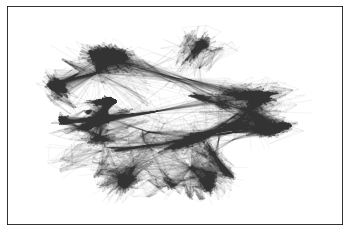

In [17]:
# Caluclate layout and draw
# For large graphs, this may take a while (60 seconds)
pos = nx.spring_layout(G_social, k=0.1)
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)

In [18]:
# This library helps find communities within social network graphs
import networkx.algorithms.community as nxcom

# For large networks, this may take a while (34 seconds)
communities = sorted(nxcom.greedy_modularity_communities(G_social), key=len, reverse=True)

# communities is a list of sets of vertices
# E.g., communities[0] is a list of the vertices in the first community
print(len(communities), 'communities found')

13 communities found


In [19]:
# How big is each community?
for i, c in enumerate(communities):
    print('community', i, 'has', len(c), 'vertices')

community 0 has 983 vertices
community 1 has 815 vertices
community 2 has 548 vertices
community 3 has 543 vertices
community 4 has 372 vertices
community 5 has 219 vertices
community 6 has 208 vertices
community 7 has 206 vertices
community 8 has 59 vertices
community 9 has 37 vertices
community 10 has 25 vertices
community 11 has 18 vertices
community 12 has 6 vertices


In [20]:
# Let's use a colormap to define colors for our communities
from matplotlib import cm
# this colormap has RGB values for 20 distinct colors
cm.tab20.colors

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.74117647

In [21]:
# Helper functions to labels nodes/edges with community
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

# Helper function to get distinct colors for display
def get_color(i):
    colors = cm.tab20.colors

    # If i gets too big for how many colors we have, wrap around
    if i > len(colors):
        i = i % len(colors)

    return colors[i]

In [22]:
# Set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)

In [23]:
# Set community color for internal edges
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = [get_color(G_social.edges[e]['community']) for e in internal]

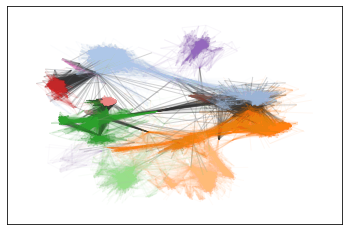

In [24]:
# Draw external edges
nx.draw_networkx(
    G_social, pos=pos, node_size=0,
    edgelist=external, edge_color="#333333",
    alpha=0.2, with_labels=False)
# Draw internal edges
nx.draw_networkx(
    G_social, pos=pos, node_size=0,
    edgelist=internal, edge_color=internal_color,
    alpha=0.05, with_labels=False)